In [293]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

## Analisis Preliminar

In [294]:
df_train = pd.read_csv('./data/Entrenamieto_ECI_2020.csv')


In [295]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [296]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

In [297]:
df_index

RangeIndex(start=0, stop=16947, step=1)

In [298]:
df_columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [299]:
df_data

array([[27761, 'EMEA', 'None', ..., 5272800.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [27760, 'EMEA', 'None', ..., 48230.0, 'Closed Won',
        'Prod_Category_A_None'],
       [27446, 'Americas', 'NW America', ..., 83865.6, 'Closed Won',
        'Prod_Category_A_None'],
       ...,
       [8792, 'EMEA', 'Austria', ..., 299715.0, 'Closed Won',
        'Prod_Category_A_None'],
       [28561, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [28318, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None']], dtype=object)

In [300]:
#tipo asociados a cada columna

In [301]:
df_train.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [302]:
df_train.dtypes.value_counts()

object     39
int64       9
float64     4
dtype: int64

In [303]:
df_train.size

881244

In [304]:
df_train.shape

(16947, 52)

In [305]:
df_train.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [306]:
print(len(df_train))

16947


In [307]:
df_train.dropna(inplace=True)

In [308]:
print(len(df_train))

13684


In [309]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None


# Analisis de nulos

In [310]:
    
print( df_train.Actual_Delivery_Date.isna().sum())
print(df_train.Actual_Delivery_Date.isna().count())
print( df_train.Actual_Delivery_Date.isnull().sum())
print(df_train.Actual_Delivery_Date.isnull().count())

0
13684
0
13684


In [311]:
def valoresNulos2(columna):
    
    suma_null = columna.isna().sum()
    total = columna.isna().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    
    print (columna.name.ljust(35)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    #return columna.name,total,suma_null,porcentaje_nulos

In [312]:
for col1 in df_train.columns:
    valoresNulos2(df_train[col1])

ID                                   13684                   0      0.00%
Region                               13684                   0      0.00%
Territory                            13684                   0      0.00%
Pricing, Delivery_Terms_Quote_Appr   13684                   0      0.00%
Pricing, Delivery_Terms_Approved     13684                   0      0.00%
Bureaucratic_Code_0_Approval         13684                   0      0.00%
Bureaucratic_Code_0_Approved         13684                   0      0.00%
Submitted_for_Approval               13684                   0      0.00%
Bureaucratic_Code                    13684                   0      0.00%
Account_Created_Date                 13684                   0      0.00%
Source                               13684                   0      0.00%
Billing_Country                      13684                   0      0.00%
Account_Name                         13684                   0      0.00%
Opportunity_Name                     1

In [313]:
def valoresNulos1(columna):
    
    #counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

In [314]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [315]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

,Columna,Total,Cantidad Nulos,%Nulos
0,ID,13684,0,0.0
1,Region,13684,0,0.0
2,Territory,13684,0,0.0
3,"Pricing, Delivery_Terms_Quote_Appr",13684,0,0.0
4,"Pricing, Delivery_Terms_Approved",13684,0,0.0
5,Bureaucratic_Code_0_Approval,13684,0,0.0
6,Bureaucratic_Code_0_Approved,13684,0,0.0
7,Submitted_for_Approval,13684,0,0.0
8,Bureaucratic_Code,13684,0,0.0
9,Account_Created_Date,13684,0,0.0


No se observan campos vacios en el set de datos, sin embargo veremos campos del estilo None en Territory o Nat Actual_Delivery_Date

In [316]:
pd.isna(df_train.Actual_Delivery_Date).value_counts()

False    13684
Name: Actual_Delivery_Date, dtype: int64

# Analisis de Regiones y Territorios

## Regiones

In [317]:
df_train.Region.unique()

array(['EMEA', 'Americas', 'Japan', 'APAC', 'Middle East'], dtype=object)

In [318]:
grouped_Region = df_train['Region'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region": "total"})

grouped_Region

,total
EMEA,4656
Americas,3466
APAC,3235
Japan,2143
Middle East,184


In [319]:
grouped_Region.reset_index()

,index,total
0,EMEA,4656
1,Americas,3466
2,APAC,3235
3,Japan,2143
4,Middle East,184


In [320]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4656
Americas       3466
APAC           3235
Japan          2143
Middle East     184
Name: total, dtype: int64

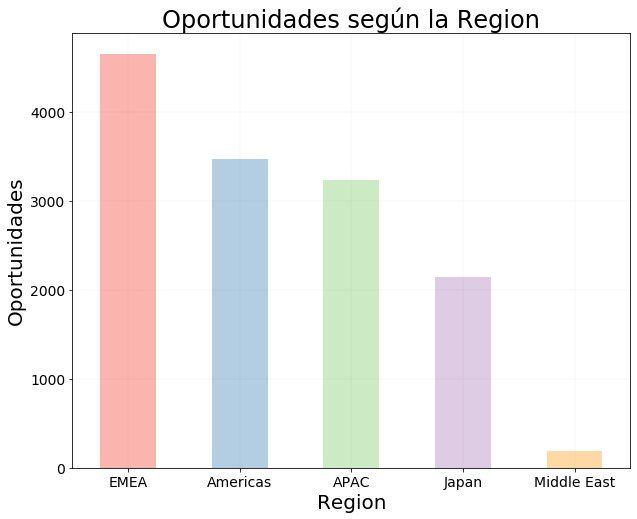

In [321]:

paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Territorios

In [322]:
df_train.Territory.unique()

array(['None', 'NW America', 'India', 'Italy', 'Germany',
       'United Kingdom', 'UAE (Dubai)', 'Greece', 'Switzerland',
       'Austria', 'NE America', 'Belgium', 'Japan', 'Tunisia',
       'SE America', 'France', 'Spain', 'Singapore', 'Philippines',
       'SW America', 'Denmark', 'Central America', 'Poland', 'Norway',
       'Thailand', 'Portugal', 'South Korea', 'Australia', 'Netherlands',
       'Kuwait', 'Cambodia', 'Indonesia', 'China (PRC)', 'KSA', 'Ireland',
       'Jordan', 'Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco',
       'Kazakhstan', 'Romania', 'Hungary', 'Taiwan', 'South America',
       'South East Asia', 'Macedonia', 'Ukraine', 'Czech Republic',
       'Belarus', 'Solomon Islands', 'Vietnam', 'Saudi Arabia',
       'Bosnia & Herzegovina', 'Kosovo', 'Luxembourg', 'Bulgaria',
       'UAE (Others)', 'Armenia', 'Croatia', 'Malaysia', 'Georgia',
       'Estonia', 'Pakistan', 'Canada', 'Central US', 'Carribean',
       'Malta', 'New Zealand', 'Albania', 'Oman', 'Bur

In [323]:
#df_train['Territory_unified'] = df_train.Territory
df_train.loc[:,'Territory_unified'] = df_train['Territory']

### Unificacion de "SE America", "SW America", "NE America", "NW America","Central US" como United States

In [324]:
df_train['Territory_unified'].replace(to_replace =["SE America", "SW America", "NE America", "NW America","Central US"],  
                            value ="United States",inplace=True)

### Japon como territorio independiente

Japon se encuentra como Region independiente, de ese analisis se puede deducir que los casos donde Territory sea None y su region Japon se puede completar para ese territorio

In [325]:
df_train[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan')]['Territory_unified']\
            .replace(to_replace ="None",value ="Japan",inplace=True)


/home/cesar/anaconda3/envs/venvp35/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [326]:
df_train.loc[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan'),'Territory_unified'] = 'Japan'

In [327]:
grouped_Territory = df_train['Territory_unified'].value_counts().reset_index()
grouped_Territory = grouped_Territory.rename(columns={"Territory_unified": "total","index":"Territory_unified"})



In [328]:
grouped_Territory[grouped_Territory['Territory_unified'].str.match('Central US')]

,Territory_unified,total


In [329]:
#sum_United_States = grouped_Territory[ grouped_Territory['Territory'].str.match('Central US') | grouped_Territory['Territory'].str.match('SW America') | grouped_Territory['Territory'].str.match('SE America') | grouped_Territory['Territory'].str.match('NW America') | grouped_Territory['Territory'].str.match('NE America') ]['total'].sum()
#sum_United_States
#row_US = {'Territory':'America', 'total':sum_United_States}
##append row to the dataframe
#grouped_Territory = grouped_Territory.append(row_US,ignore_index=True)


In [330]:
grouped_Territory.set_index('Territory_unified',inplace=True)

In [331]:
grouped_Territory

,total
Territory_unified,
United States,2903
Japan,2143
Germany,1682
Australia,1207
India,809
None,689
Netherlands,533
France,447
Singapore,441


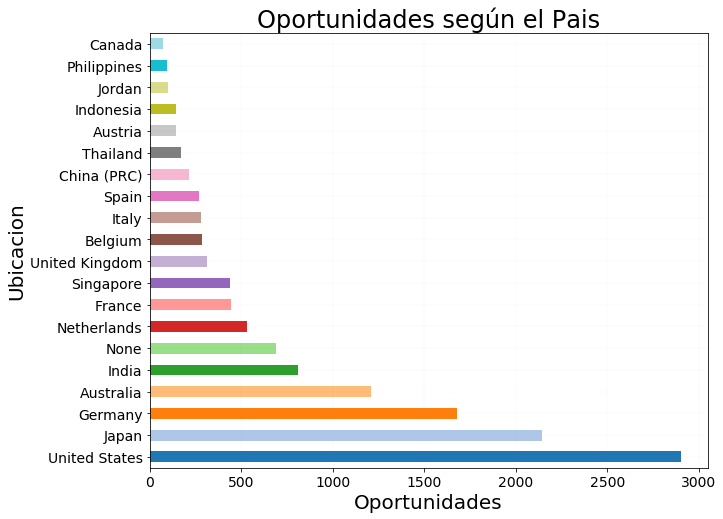

In [332]:
grouped_Territory_top20 = grouped_Territory['total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Territory_top20)))

grouped_Territory_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Oportunidades según el Pais', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Ubicacion', fontsize=20);

Se produzco una disminución de los casos None debido a la corrección en la Region de Japon

## Analisis de los None dentro de las Regiones y Territorios

Observando el grafico de Region y de Territorios se observo una alta tasa de territorio sin definir. Al comparar los graficos se observo que Japon se encuentra como Region individual por lo que no coincidia con su ranking de las oportunidades. 

In [333]:


grouped_Region_Terrotory = df_train.groupby(['Region','Territory_unified'])['Region'].count()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={"Region": "total"})
grouped_Region_Terrotory = grouped_Region_Terrotory.reset_index()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={0: "total"})
grouped_Region_Terrotory

,Region,Territory_unified,total
0,APAC,Australia,1207
1,APAC,Burma,1
2,APAC,Cambodia,4
3,APAC,China (PRC),218
4,APAC,India,809
5,APAC,Indonesia,145
6,APAC,Malaysia,5
7,APAC,New Zealand,38
8,APAC,Philippines,95
9,APAC,Singapore,441


In [334]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']

,Region,Territory_unified,total
18,Americas,None,474
51,EMEA,None,185
72,Middle East,None,30


In [335]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='United States']

,Region,Territory_unified,total
19,Americas,United States,2892
66,EMEA,United States,11


In [336]:
df_train[(df_train.Territory_unified=='United States') & (df_train.Region=='EMEA') ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
773,28062,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,2017,NaT,25,USD,9466875.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States
774,28063,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,2017,NaT,35,USD,13038750.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States
3659,8043,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3660,8048,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3661,8056,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3662,8061,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3663,8067,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3667,8037,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,400,USD,153978825.0,USD,153978825.0,Closed Lost,Prod_Category_A_None,United States
6114,16214,EMEA,SE America,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2017,NaT,1,EUR,364635.0,EUR,364635.0,Closed Lost,Prod_Category_A_None,United States
16636,18241,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,12/6/2013,...,2016,NaT,1,EUR,609960.0,EUR,609960.0,Closed Lost,Prod_Category_A_None,United States


Como se menciono más arriba el caso de Japon se puede determinar que ese territorio para los otros casos no se puede determinar su Territorio

In [337]:
df_train[(df_train.Territory_unified=='None') & (df_train.Region == 'Americas')]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
409,17313,Americas,None,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,2,USD,1051430.63,USD,0.00,Closed Lost,Prod_Category_A_None,None
461,8925,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,1/21/2016,...,2016,NaT,0,USD,187.60,USD,187.60,Closed Won,Prod_Category_A_None,None
577,23006,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,3025.05,USD,0.00,Closed Won,Prod_Category_A_None,None
578,17170,Americas,None,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,18900.00,USD,18900.00,Closed Won,Prod_Category_A_None,None
597,17042,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,56983.50,USD,56983.50,Closed Won,Prod_Category_A_None,None
607,17892,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,14773.50,USD,14773.50,Closed Won,Prod_Category_A_None,None
634,21829,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,26592.30,USD,0.00,Closed Won,Prod_Category_A_None,None
661,27486,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,2884.35,USD,2884.35,Closed Won,Prod_Category_A_None,None
662,27488,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2017,NaT,0,USD,57400.00,USD,57400.00,Closed Lost,Prod_Category_A_None,None
663,17033,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,12600.00,USD,12600.00,Closed Won,Prod_Category_A_None,None


#Japon se observa como Region independiente por lo tanto se puede reemplazar los valorse none

Tenemos una gran cantidad de propuestas donde el data se no detalla el origen de la propuesta.

In [338]:
import pygal as pg
  
# create a world map 
#worldmap =  pg.maps.World.SupranationalWorld() 
worldmap = pg.maps.world.World()
# set the title of map 
worldmap.title = 'Continents'
  
# adding the continents 
worldmap.add('Africa', [('africa')]) 
worldmap.add('North america', [('north_america')]) 
worldmap.add('Oceania', [('oceania')]) 
worldmap.add('South america', [('south_america')]) 
worldmap.add('Asia', [('asia')]) 
worldmap.add('Europe', [('europe')]) 
worldmap.add('Antartica', [('antartica')]) 
  
# save into the file 
worldmap.render_to_file('abc.svg') 
  
print("Success") 

Success


In [339]:
#!pip install pygal
#!pip install pygal_maps_world


In [340]:
# Plot population estimates with an accurate legend

#fig, ax = plt.subplots(1, 1)

#world.plot(column='pop_est',
#            ax=ax,
#            legend=True,
#            legend_kwds={'label': "Population by Country",'orientation': "horizontal"})

## Correccion de Nombres de Territorios

Para poder graficar los territorio primero haremos unas revisión de los nombres.
Utilizaresmos geonameschema y compararemos los nombres y buscaremos cuales no aparecen en la api.

In [341]:
!pip install geonamescache

In [342]:
from geonamescache import GeonamesCache

countries = GeonamesCache().get_countries_by_names()
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

In [343]:
countries.keys()

dict_keys(['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Aland Islands', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Saint Barthelemy', 'Bermuda', 'Brunei', 'Bolivia', 'Bonaire, Saint Eustatius and Saba ', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos Islands', 'Democratic Republic of the Congo', 'Central African Republic', 'Republic of the Congo', 'Switzerland', 'Ivory Coast', 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji',

In [344]:
(list(countries)=='Cuba')

False

In [345]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

### Creacion de la columna Region_unified

generamos una nueva columna

In [346]:
df_train.loc[:,'Region_unified'] = df_train.loc[:,'Region'] 

### Reemplazo de Burma por Myanmar y South East Asia

In [347]:
df_train[(df_train.Territory_unified.str.contains('Burma')) ].Region.unique() #& (df_train.Region == 'Americas')

array(['APAC'], dtype=object)

In [348]:
#Reemplazo a Burma y South East Asia (si bien es un territorio muy grande son solo 2 registros y Myanmar pertenece a el)
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Burma', 'Myanmar')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('South East Asia', 'Myanmar')



### Correccion en Bosnia & Herzagovina por Bosnia and Herzegovina

In [349]:

df_train[(df_train.Territory_unified.str.contains('Bosnia & Herzegovina')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
4794,13905,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,10/21/2016,...,NaT,0,EUR,81487.50,EUR,81487.50,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina,EMEA
4813,10908,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina,EMEA
4814,10914,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina,EMEA
4815,10919,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina,EMEA


In [350]:
#Reemplazo

df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')


### Reemplazo de China PRC por China

In [351]:
df_train[(df_train.Territory_unified.str.contains('China')) ] 

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
942,6678,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,1/23/2017,...,NaT,3,USD,929994.00,USD,929994.00,Closed Lost,Prod_Category_A_None,China (PRC),APAC
1168,9703,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,4914.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC),APAC
1169,9708,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,1228.50,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC),APAC
1170,9714,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,18020.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC),APAC
1171,9719,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,18785.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC),APAC
1172,9726,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,3315.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC),APAC
1512,10258,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,83475.00,USD,109725.00,Closed Won,Prod_Category_A_None,China (PRC),APAC
1513,10263,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,NaT,0,USD,26250.00,USD,109725.00,Closed Won,Prod_Category_A_None,China (PRC),APAC
1641,9916,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,3/2/2017,...,NaT,11,USD,3300030.00,USD,3300030.00,Closed Lost,Prod_Category_A_None,China (PRC),APAC
1907,9193,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,1/29/2016,...,NaT,2,USD,398090.00,USD,398090.00,Closed Won,Prod_Category_A_None,China (PRC),APAC


In [352]:
# Reemplazo China PRC Por China
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('China (PRC)', 'China')


In [353]:
df_train[(df_train.Territory_unified.str.contains('United')) ].Region.unique()

array(['Americas', 'EMEA'], dtype=object)

### Reemplazo de Czech Republic por Czechia

In [354]:
df_train[(df_train.Territory_unified.str.contains('Czech Republic')) ] #& (df_train.Region == 'Americas')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
3768,8266,EMEA,Czech Republic,0,0,0,0,0,Bureaucratic_Code_4,7/18/2016,...,NaT,0,EUR,101400.0,EUR,101400.0,Closed Lost,Prod_Category_A_None,Czech Republic,EMEA


In [355]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Czech Republic', 'Czechia')


### Reemplazo de KZA por Saudi Arabia

In [356]:
df_train[(df_train.Territory_unified.str.contains('KSA')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
994,18723,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,7/28/2013,...,NaT,120,USD,41999989.50,USD,4.199999e+07,Closed Lost,Prod_Category_A_None,KSA,Middle East
995,6816,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,1/24/2017,...,NaT,120,USD,41999989.50,USD,4.199999e+07,Closed Lost,Prod_Category_A_None,KSA,Middle East
4754,23554,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,12/10/2014,...,NaT,0,USD,30240.00,USD,3.024000e+04,Closed Won,Prod_Category_A_None,KSA,Middle East
5196,15167,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,11/20/2016,...,NaT,2,USD,0.00,USD,0.000000e+00,Closed Lost,Prod_Category_A_None,KSA,Middle East
6097,11501,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,3/28/2017,...,NaT,0,USD,35012.25,USD,3.501225e+04,Closed Lost,Prod_Category_A_None,KSA,Middle East
11477,12150,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,12/28/2017,...,NaT,1,USD,412440.00,USD,4.124400e+05,Closed Lost,Prod_Category_A_None,KSA,Middle East
12879,4863,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,3,USD,1029105.00,USD,1.029105e+06,Closed Lost,Prod_Category_A_None,KSA,Middle East
13475,16356,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,73150.00,EUR,6.467192e+04,Closed Lost,Prod_Category_A_None,KSA,Middle East
13609,16312,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,73150.00,USD,7.315000e+04,Closed Won,Prod_Category_A_None,KSA,Middle East
14347,16317,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,82473.60,USD,1.440736e+05,Closed Won,Prod_Category_A_None,KSA,Middle East


In [357]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('KSA', 'Saudi Arabia')


### Reemplazo de Macedonia por North Macedonia

In [358]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
3190,23704,EMEA,Macedonia,0,0,0,0,0,Bureaucratic_Code_4,1/21/2015,...,NaT,0,EUR,32760.0,EUR,32760.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
12320,15908,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,5655.0,EUR,102783.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
12321,16391,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,97128.0,EUR,102783.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
16299,27972,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,549450.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA
16300,27973,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA
16301,27974,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA


In [359]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Macedonia','North Macedonia')



In [360]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
3190,23704,EMEA,Macedonia,0,0,0,0,0,Bureaucratic_Code_4,1/21/2015,...,NaT,0,EUR,32760.0,EUR,32760.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
12320,15908,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,5655.0,EUR,102783.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
12321,16391,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,97128.0,EUR,102783.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
16299,27972,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,549450.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA
16300,27973,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA
16301,27974,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA


### Reemplazo de UAE (Dubai) y UAE (Others)  por United Arab Emirates

In [361]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
78,4904,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,12/8/2015,...,NaT,0,USD,7.695000e+03,USD,7695.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
399,8737,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,1/12/2016,...,NaT,2,USD,7.951060e+05,USD,795106.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
999,6839,Middle East,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,1/24/2017,...,NaT,0,USD,5.644170e+04,USD,56441.70,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
1930,10608,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,2/5/2016,...,NaT,40,USD,1.980011e+07,USD,19800113.85,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
1932,10597,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,2/5/2016,...,NaT,5,USD,2.650021e+06,USD,2650021.20,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
1934,4898,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,12/8/2015,...,NaT,25,USD,1.250013e+07,USD,12500130.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
2806,4909,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,12/8/2015,...,NaT,250,USD,1.237501e+08,USD,0.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
2812,14831,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,9,USD,4.524112e+06,USD,4524111.80,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
2813,14815,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,2,USD,1.064781e+06,USD,1064780.60,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA
2814,14804,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,1,USD,3.207984e+05,USD,320798.40,Closed Lost,Prod_Category_A_None,UAE (Dubai),EMEA


In [362]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Dubai)','United Arab Emirates')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Others)','United Arab Emirates')



In [363]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified


### Reemplazo de South America por un pais

 Para graficar America del Sur distribuyo los paises asignados 
#Brazil Argentina Chile Uruguay Colombia Peru Venezuela Paraguay Ecuador

In [364]:
South_America = ["Brazil","Argentina","Chile", "Uruguay",'Colombia',"Peru", "Ecuador", "Venezuela", "Bolivia"]
j = 0
for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'South America':  
        print (row["Territory_unified"], index, South_America[j])
        #df_train.iloc[index]["Territory_unified"] = South_America[j]       
        df_train.loc[index, 'Territory_unified'] = South_America[j]
        j=j+1

South America 2384 Brazil
South America 4700 Argentina
South America 4753 Chile
South America 5257 Uruguay
South America 6671 Colombia
South America 6672 Peru
South America 11754 Ecuador
South America 11755 Venezuela
South America 15895 Bolivia


In [365]:
df_train[df_train.Territory=='South America']


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
2384,18235,EMEA,South America,1,0,1,0,0,Bureaucratic_Code_5,12/6/2013,...,NaT,1,USD,349440.00,USD,349440.00,Closed Lost,Prod_Category_A_None,Brazil,EMEA
4700,13694,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,10/15/2016,...,NaT,1,USD,459270.00,USD,459270.00,Closed Lost,Prod_Category_A_None,Argentina,EMEA
4753,13805,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,10/18/2016,...,NaT,0,USD,72800.00,USD,72800.00,Closed Lost,Prod_Category_A_None,Chile,EMEA
5257,11449,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,9/23/2016,...,NaT,3,USD,1092000.00,EUR,965437.20,Closed Lost,Prod_Category_A_None,Uruguay,EMEA
6671,23990,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,4/7/2015,...,NaT,47,EUR,17327100.00,EUR,34409861.25,Closed Lost,Prod_Category_A_None,Colombia,EMEA
6672,23991,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,4/7/2015,...,NaT,46,EUR,17082761.25,EUR,34409861.25,Closed Lost,Prod_Category_A_None,Peru,EMEA
11754,13718,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,3/29/2018,...,NaT,7,EUR,2201355.00,EUR,6501105.00,Closed Lost,Prod_Category_A_None,Ecuador,EMEA
11755,13725,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,3/29/2018,...,NaT,13,EUR,4299750.00,EUR,6501105.00,Closed Lost,Prod_Category_A_None,Venezuela,EMEA
15895,13046,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,2/19/2018,...,NaT,20,USD,5309550.00,USD,5309550.00,Proposal,Prod_Category_A_None,Bolivia,EMEA


In [366]:
#Controlo los resultados que modifique1235

df_train.loc[df_train.Territory.str.contains('South America'),['Region','Territory','Region_unified','Territory_unified']]

,Region,Territory,Region_unified,Territory_unified
2384,EMEA,South America,EMEA,Brazil
4700,EMEA,South America,EMEA,Argentina
4753,EMEA,South America,EMEA,Chile
5257,EMEA,South America,EMEA,Uruguay
6671,EMEA,South America,EMEA,Colombia
6672,EMEA,South America,EMEA,Peru
11754,EMEA,South America,EMEA,Ecuador
11755,EMEA,South America,EMEA,Venezuela
15895,EMEA,South America,EMEA,Bolivia


In [367]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Carribean', 'Central America', 'None']

### Reemplazo de Carribean por un pais

In [368]:
#https://en.wikipedia.org/wiki/Caribbean#Countries_and_territories

In [369]:
df_train.loc[df_train.Territory_unified=='Carribean',:].groupby('Territory')['Territory'].count()

Territory
Carribean    29
Name: Territory, dtype: int64

In [370]:
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Republic", "Bahamas"]
j = 0
i= 0
for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'Carribean':  
        print (row["Territory_unified"], index,j,len(Carribean), j%len(Carribean),Carribean[i])
        i=j%len(Carribean)
        df_train.loc[index, 'Territory_unified'] = Carribean[i]
        j=j+1

 

Carribean 7489 0 8 0 Honduras
Carribean 8992 1 8 1 Honduras
Carribean 9202 2 8 2 Cuba
Carribean 9455 3 8 3 Trinidad and Tobago
Carribean 9456 4 8 4 Haiti
Carribean 9457 5 8 5 Jamaica
Carribean 9549 6 8 6 Puerto Rico
Carribean 9550 7 8 7 Dominican Republic
Carribean 9637 8 8 0 Bahamas
Carribean 9934 9 8 1 Honduras
Carribean 10269 10 8 2 Cuba
Carribean 10481 11 8 3 Trinidad and Tobago
Carribean 11109 12 8 4 Haiti
Carribean 11774 13 8 5 Jamaica
Carribean 11775 14 8 6 Puerto Rico
Carribean 11776 15 8 7 Dominican Republic
Carribean 11833 16 8 0 Bahamas
Carribean 11864 17 8 1 Honduras
Carribean 11885 18 8 2 Cuba
Carribean 11890 19 8 3 Trinidad and Tobago
Carribean 12024 20 8 4 Haiti
Carribean 12845 21 8 5 Jamaica
Carribean 12966 22 8 6 Puerto Rico
Carribean 13328 23 8 7 Dominican Republic
Carribean 13329 24 8 0 Bahamas
Carribean 14414 25 8 1 Honduras
Carribean 14662 26 8 2 Cuba
Carribean 15498 27 8 3 Trinidad and Tobago
Carribean 15802 28 8 4 Haiti


In [371]:
#df_train.loc[df_train.Territory_unified=='Carribean',:]
df_train.loc[df_train.Territory.str.contains('Carribean'),['Region','Territory','Region_unified','Territory_unified']]

,Region,Territory,Region_unified,Territory_unified
7489,Americas,Carribean,Americas,Honduras
8992,Americas,Carribean,Americas,Cuba
9202,Americas,Carribean,Americas,Trinidad and Tobago
9455,Americas,Carribean,Americas,Haiti
9456,Americas,Carribean,Americas,Jamaica
9457,Americas,Carribean,Americas,Puerto Rico
9549,Americas,Carribean,Americas,Dominican Republic
9550,Americas,Carribean,Americas,Bahamas
9637,Americas,Carribean,Americas,Honduras
9934,Americas,Carribean,Americas,Cuba


In [372]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Central America', 'None']

### Reemplazo de Central America por un pais

In [373]:
df_train.loc[df_train.Territory_unified=='Central America',:].groupby('Territory')['Territory'].count()

Territory
Central America    8
Name: Territory, dtype: int64

In [374]:
countries.keys()

dict_keys(['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Aland Islands', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Saint Barthelemy', 'Bermuda', 'Brunei', 'Bolivia', 'Bonaire, Saint Eustatius and Saba ', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos Islands', 'Democratic Republic of the Congo', 'Central African Republic', 'Republic of the Congo', 'Switzerland', 'Ivory Coast', 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji',

In [375]:
#Mexico no se lo asume como de Centro America.
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]
j = 0

for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'Central America':  
        print (row["Territory_unified"], index,j,len(CentralAmerica), j%len(CentralAmerica),CentralAmerica[i])
        i=j%len(CentralAmerica)
        df_train.loc[index, 'Territory_unified'] = CentralAmerica[i]
        j=j+1

Central America 407 0 7 0 Honduras
Central America 1212 1 7 1 Belize
Central America 3843 2 7 2 Costa Rica
Central America 5071 3 7 3 El Salvador
Central America 16620 4 7 4 Guatemala
Central America 16659 5 7 5 Honduras
Central America 16732 6 7 6 Nicaragua
Central America 16733 7 7 0 Panama


In [376]:
#df_train['Territory_unified'].replace(to_replace ="Mexico",value ="Panama",inplace=True)

### Reemplazo de Territorio None por un pais

In [377]:
df_train.loc[df_train.Territory_unified.str.contains('None'),['Region','Territory','Region_unified','Territory_unified']]

,Region,Territory,Region_unified,Territory_unified
0,EMEA,None,EMEA,None
1,EMEA,None,EMEA,None
135,EMEA,None,EMEA,None
180,EMEA,None,EMEA,None
182,EMEA,None,EMEA,None
183,EMEA,None,EMEA,None
184,EMEA,None,EMEA,None
185,EMEA,None,EMEA,None
214,EMEA,None,EMEA,None
215,EMEA,None,EMEA,None


### Control Final

Vuelvo a ejecutar el control para ver cuales son las diferencias

In [378]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['None']

In [379]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [380]:
row

[('ID', 13684, 0, 0.0),
 ('Region', 13684, 0, 0.0),
 ('Territory', 13684, 0, 0.0),
 ('Pricing, Delivery_Terms_Quote_Appr', 13684, 0, 0.0),
 ('Pricing, Delivery_Terms_Approved', 13684, 0, 0.0),
 ('Bureaucratic_Code_0_Approval', 13684, 0, 0.0),
 ('Bureaucratic_Code_0_Approved', 13684, 0, 0.0),
 ('Submitted_for_Approval', 13684, 0, 0.0),
 ('Bureaucratic_Code', 13684, 0, 0.0),
 ('Account_Created_Date', 13684, 0, 0.0),
 ('Source ', 13684, 0, 0.0),
 ('Billing_Country', 13684, 0, 0.0),
 ('Account_Name', 13684, 0, 0.0),
 ('Opportunity_Name', 13684, 0, 0.0),
 ('Opportunity_ID', 13684, 0, 0.0),
 ('Sales_Contract_No', 13684, 0, 0.0),
 ('Account_Owner', 13684, 0, 0.0),
 ('Opportunity_Owner', 13684, 0, 0.0),
 ('Account_Type', 13684, 0, 0.0),
 ('Opportunity_Type', 13684, 0, 0.0),
 ('Quote_Type', 13684, 0, 0.0),
 ('Delivery_Terms', 13684, 0, 0.0),
 ('Opportunity_Created_Date', 13684, 0, 0.0),
 ('Brand', 13684, 0, 0.0),
 ('Product_Type', 13684, 0, 0.0),
 ('Size', 13684, 0, 0.0),
 ('Product_Category_B'

In [381]:
#United Arab Emirates

## Correccion en Regiones

Del primer analisis de territorios se observaron casos donde para un mismo Territorio estaba asignado a más de una región. Se buscarán si exiten más casos

In [382]:
grouped_Territory_Region = df_train.groupby(['Territory','Region'])['Region'].count().to_frame()
grouped_Territory_Region
grouped_Territory_Region = grouped_Territory_Region.rename(columns={"Region": "total"})
grouped_Territory_Region

,,total
Territory,Region,
Albania,EMEA,2
Armenia,EMEA,2
Australia,APAC,1207
Austria,EMEA,145
Belarus,EMEA,4
Belgium,EMEA,285
Bosnia & Herzegovina,EMEA,4
Bulgaria,EMEA,5
Burma,APAC,1


### Cantidad de Regiones y Territorios

In [383]:
agrouped_Territory_Region_count = grouped_Territory_Region.groupby('Territory')['total'].count().to_frame()

In [384]:
agrouped_Territory_Region_count[agrouped_Territory_Region_count.total > 1]

,total
Territory,
Jordan,2
KSA,2
None,4
SE America,2
SW America,2
UAE (Dubai),2


estos son los casos que tienen 2 o mas regiones asignadas

### Correccion para KSA - Saudi Arabia

Para KSA surgieron 2 Regiones. Se debe corregir las regiones que sean de Saudi Arabia y Region EMEA. Pasara a ser Middle East

In [385]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'].replace('EMEA', 'Middle East')

In [386]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None,None,EMEA
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None,None,EMEA
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None,United States,Americas
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None,United States,Americas
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None,United States,Americas
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None,United States,Americas
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None,United States,Americas
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None,United States,Americas
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,NaT,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None,Japan,Japan
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,NaT,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None,Japan,Japan


In [387]:
df_train[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA'))]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
15192,16295,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,57750.0,USD,57750.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East
16029,4858,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,73689.0,USD,73689.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East


In [388]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

array(['Americas', 'EMEA'], dtype=object)

In [389]:


df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'].replace('EMEA', 'Americas')


In [390]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

array(['Americas', 'EMEA'], dtype=object)

In [391]:
df_train[df_train.Region !=  df_train.Region_unified]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
773,28062,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,NaT,25,USD,9466875.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States,Americas
774,28063,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,NaT,35,USD,13038750.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States,Americas
3659,8043,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3660,8048,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3661,8056,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3662,8061,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3663,8067,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3667,8037,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,400,USD,153978825.0,USD,153978825.0,Closed Lost,Prod_Category_A_None,United States,Americas
6114,16214,EMEA,SE America,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,1,EUR,364635.0,EUR,364635.0,Closed Lost,Prod_Category_A_None,United States,Americas
15192,16295,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,57750.0,USD,57750.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East


### Correccion de South America como territorio EMEA


In [392]:
df_train[(df_train['Territory_unified'].str.match('South America'))]['Region'].unique()

array([], dtype=object)

In [393]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'].replace('EMEA', 'Americas')


In [394]:
df_train[(df_train['Territory'].str.match('South America'))]['Region_unified'].unique()

array(['Americas'], dtype=object)

In [395]:
grouped_Territory_Region = grouped_Territory_Region.reset_index()
grouped_Territory_Region

,Territory,Region,total
0,Albania,EMEA,2
1,Armenia,EMEA,2
2,Australia,APAC,1207
3,Austria,EMEA,145
4,Belarus,EMEA,4
5,Belgium,EMEA,285
6,Bosnia & Herzegovina,EMEA,4
7,Bulgaria,EMEA,5
8,Burma,APAC,1
9,Cambodia,APAC,4


### Correccion de Region para Jordan

In [396]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region'].unique()

array(['Middle East', 'EMEA'], dtype=object)

In [397]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
1078,6856,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,1/27/2017,...,NaT,248,USD,86659980.75,USD,86659980.75,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1188,7412,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,0,USD,174944.00,USD,484220.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1189,7417,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,1,USD,309276.00,USD,484220.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1395,13037,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,1,USD,204120.00,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1396,13042,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,0,USD,46027.50,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1397,13048,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,0,USD,26235.00,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1520,9550,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/21/2017,...,NaT,0,USD,110200.00,USD,110200.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1590,9750,Middle East,Jordan,1,1,0,0,0,Bureaucratic_Code_4,2/27/2017,...,NaT,0,USD,40800.00,USD,83010.00,Closed Won,Prod_Category_A_None,Jordan,Middle East
1591,9756,Middle East,Jordan,1,1,0,0,0,Bureaucratic_Code_4,2/27/2017,...,NaT,0,USD,42210.00,USD,83010.00,Closed Won,Prod_Category_A_None,Jordan,Middle East
1608,7428,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,1,USD,450450.00,USD,450450.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East


In [398]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'].replace('EMEA', 'Middle East')


In [399]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region_unified'].unique()

array(['Middle East'], dtype=object)

### Correccion de Region para UAE (Dubai)

In [400]:

df_train[(df_train['Territory_unified'].str.contains('UAE'))]['Region'].unique()

array([], dtype=object)

In [401]:
grouped_Territory_Region[grouped_Territory_Region['Territory'].str.match('UAE')]

,Territory,Region,total
78,UAE (Dubai),EMEA,12
79,UAE (Dubai),Middle East,19
80,UAE (Others),Middle East,2


In [402]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'].replace('EMEA', 'Middle East')


In [403]:
df_train[(df_train['Territory_unified'].str.match('UAE \(Dubai\)'))]['Region_unified'].unique()

array([], dtype=object)

### Correccion de Region para SE America y SW America 

Estos casos no fueron corregidos ya que se realizo en un primer analisis

## Analisis de Regiones y Territorios 2

In [404]:
grouped_Region = df_train['Region_unified'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region_unified": "total"})

grouped_Region

,total
EMEA,4621
Americas,3486
APAC,3235
Japan,2143
Middle East,199


In [405]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4621
Americas       3486
APAC           3235
Japan          2143
Middle East     199
Name: total, dtype: int64

### Grafico de Oportunidades por Region

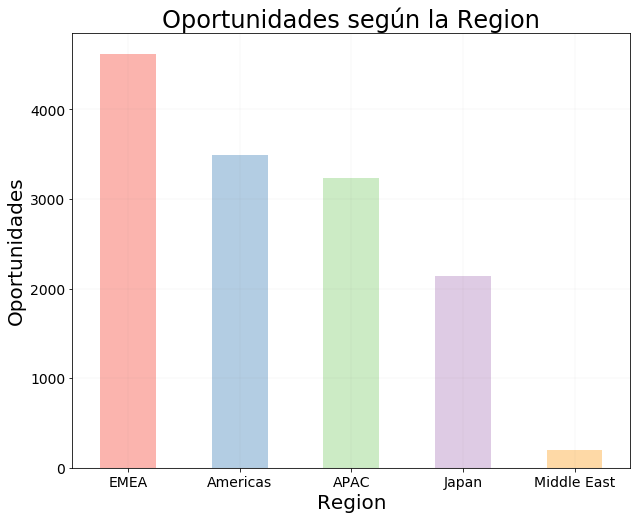

In [406]:
#13684
paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Graficos de Mapas

### Mapa de paises segun el ID en el set de datos

In [407]:
from geonamescache.mappers import country

mapper = country(from_key='name', to_key='iso3')

country_index = {}

df_train['iso3'] = df_train.Territory_unified.apply(lambda x: country_index.get(x, mapper(x)))


In [408]:
#assert all(~df_train['iso3']== None )


In [409]:
df_train.iso3.unique()

array([None, 'USA', 'JPN', 'IND', 'ITA', 'DEU', 'GBR', 'ARE', 'GRC',
       'CHE', 'AUT', 'BEL', 'TUN', 'FRA', 'ESP', 'SGP', 'PHL', 'DNK',
       'BLZ', 'POL', 'NOR', 'THA', 'PRT', 'KOR', 'AUS', 'NLD', 'KWT',
       'KHM', 'IDN', 'CHN', 'SAU', 'IRL', 'JOR', 'CYP', 'MAR', 'CRI',
       'TUR', 'SWE', 'MCO', 'KAZ', 'ROU', 'HUN', 'TWN', 'BRA', 'MMR',
       'MKD', 'UKR', 'CZE', 'SLV', 'BLR', 'SLB', 'VNM', 'ARG', 'CHL',
       'BIH', 'XKX', 'GTM', 'LUX', 'URY', 'BGR', 'ARM', 'HRV', 'MYS',
       'GEO', 'COL', 'PER', 'EST', 'PAK', 'CAN', 'HND', 'MLT', 'CUB',
       'TTO', 'NZL', 'HTI', 'JAM', 'PRI', 'DOM', 'BHS', 'ALB', 'ECU',
       'VEN', 'OMN', 'SVN', 'LBN', 'BOL', 'EGY', 'NIC', 'PAN'],
      dtype=object)

In [410]:
#!pip install geopandas


In [411]:
df_train.iso3.replace(to_replace=['None'], value='Sin Datos',inplace=True)


In [412]:
df_train[~df_train.iso3.isna()]


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified,iso3
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None,United States,Americas,USA
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None,United States,Americas,USA
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None,United States,Americas,USA
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None,United States,Americas,USA
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None,United States,Americas,USA
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None,United States,Americas,USA
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None,Japan,Japan,JPN
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None,Japan,Japan,JPN
22,24370,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,0,JPY,405600.00,JPY,579600.00,Closed Lost,Prod_Category_A_None,Japan,Japan,JPN
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,...,3,USD,1621851.00,USD,1621851.00,Closed Won,Prod_Category_A_None,India,APAC,IND


In [413]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']





In [414]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((7202132.129 5245560.427, 7171298.638..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((4839886.346 4415250.374, 4735627.351..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((13315540.260 -278091.137, 1347..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((13315540.260 -278091.137, 1329..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54..."


In [415]:
counts = df_train[~df_train.iso3.isna()].iso3.value_counts()
counts.name = 'Total'
world = world.join(counts, on='iso_a3')

In [416]:
#[~df_train.iso3.isna()]
###df con datos de geolocalicación
df_train = df_train.merge(world, left_on='iso3', right_on='iso_a3',how='right')

In [417]:
#df_train.to_csv('./data/train_with_map_data.csv')

In [418]:
df_train.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Territory_unified,Region_unified,iso3,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
0,27446.0,Americas,NW America,0.0,0.0,0.0,0.0,0.0,Bureaucratic_Code_4,4/21/2015,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
1,16808.0,Americas,NW America,1.0,0.0,1.0,0.0,0.0,Bureaucratic_Code_5,7/27/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2,16805.0,Americas,NW America,1.0,0.0,1.0,0.0,0.0,Bureaucratic_Code_5,7/27/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
3,16802.0,Americas,NW America,1.0,0.0,1.0,0.0,0.0,Bureaucratic_Code_5,7/27/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
4,16799.0,Americas,NW America,1.0,0.0,1.0,0.0,0.0,Bureaucratic_Code_5,7/27/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0


In [419]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10...",71.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0


In [420]:
world.sort_values('Total', ascending=False).head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((12404312.706 4189251.604, 1238...",2143.0
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((1125314.726 5712374.775, 1148605.394...",1682.0
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((12805614.706 -4362178.055, 128...",1207.0
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((8873616.835 3022608.705, 8889925.045...",809.0
130,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((551544.851 5684403.552, 568001.169 5...",533.0
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-493519.535 5723612.199, -5527...",313.0
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((501933.655 5409902.502, 495064.070 5...",285.0
141,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((874016.687 5003677.833, 925545...",283.0
132,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((-657979.261 3967311.026, -664357.856...",268.0


In [444]:
###!pip install pysal
#!pip install -U --no-deps mapclassify 

  Using cached mapclassify-2.3.0-py3-none-any.whl (35 kB)


In [422]:
#!pip install descartes

AttributeError: 'NoneType' object has no attribute 'prop'

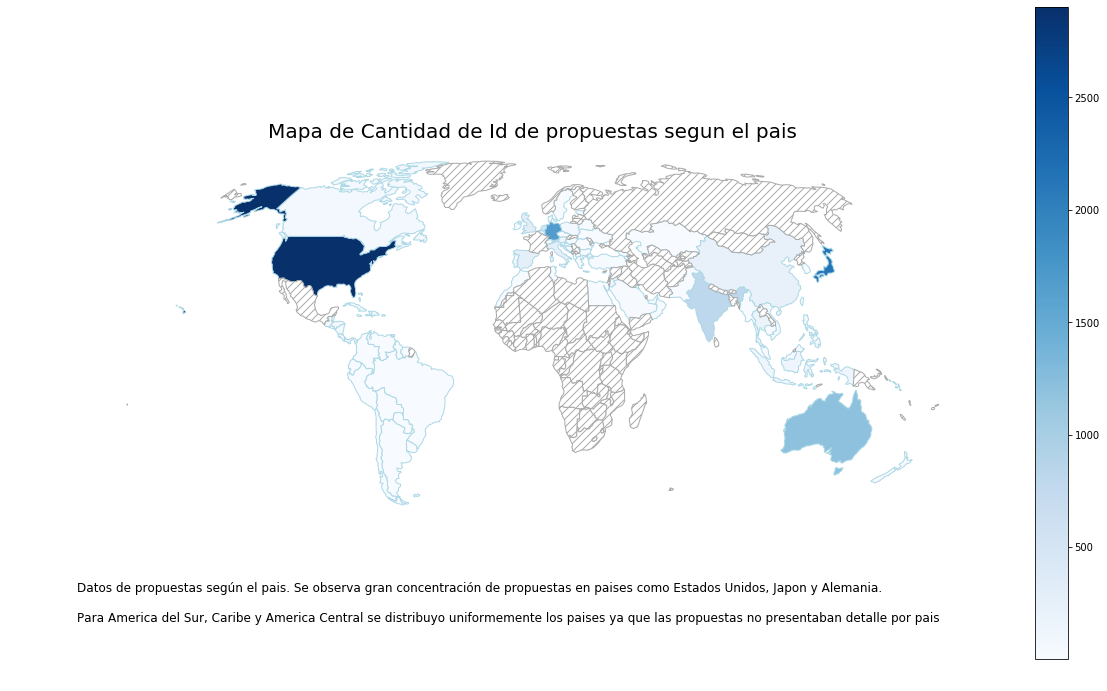

In [544]:
paisesConCasos = world.dropna(subset=['Total'])
paisesSinCasos = world[world['Total'].isna()]

ax = paisesConCasos.plot(column='Total', cmap='Blues', figsize=(20, 12), k=10, legend=True, edgecolor='lightblue')
paisesSinCasos.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de Cantidad de Id de propuestas segun el pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de propuestas según el pais. Se observa gran concentración de propuestas en paises como Estados Unidos, Japon y Alemania. \n
Para America del Sur, Caribe y America Central se distribuyo uniformemente los paises ya que las propuestas no presentaban detalle por pais'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
#legend.set_bbox_to_anchor((.11, .4))
legend.prop.set_size(12)

### Corrección en mapa de cantidad de operaciones

El grafico presenta inconsistencias, ya que estamos tomando South America como un todo pero representado en 9 paises y quedaban excluidas las Guyanas y Paraguay. Agregamos el dataset un valor en el campo total para que lo tomen. Como son pocos casos no modifica.


#### Correccion en casos totales en South America

In [424]:
world.loc[(world.continent=='South America'),'Total'] = 9


In [425]:
world[world.continent=='South America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54...",9.0
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54...",9.0
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-4950869.681 -5517533.871, -4875637....",9.0
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-5222856.014 -3231696.542, -5165791....",9.0
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-4776893.995 -3611664.215, -4812062....",9.0
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-6533260.003 -1171309.001, -6462888....",9.0
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-6596232.740 -459699.292, -6681415.9...",9.0
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-6317593.241 134049.312, -6335544.05...",9.0
40,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-5729323.869 556179.612, -5717618.22...",9.0
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-5340397.978 203157.587, -5363425.88...",9.0


#### Correccion de casos totales en Carribean

In [542]:
#Dominican Rep no coincide el nombre, se tuvo que cambiar
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]

world.loc[(world.name.isin(Carribean))]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-6657796.595 2108496.606, -6655812.8...",30.0
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-6676058.533 1929944.389, -6671160.3...",30.0
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-7229455.058 2865226.366, -718...",30.0
45,3351827,North America,Puerto Rico,PRI,131000.0,"POLYGON ((-6166125.252 1980186.489, -6119470.4...",30.0
46,2990561,North America,Jamaica,JAM,25390.0,"POLYGON ((-7216438.882 1977594.379, -7154894.3...",30.0
47,11147407,North America,Cuba,CUB,132900.0,"POLYGON ((-7590791.575 2480071.811, -7512127.3...",30.0
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-5796692.599 1150802.640, -5741973.2...",30.0


In [427]:
world[world.name.str.contains('Domin')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-6676058.533 1929944.389, -6671160.3...",3.0


In [428]:

world.loc[(world.continent=='North America') & (world.name.isin(Carribean))].groupby('continent').sum()



,pop_est,gdp_md_est,Total
continent,,,
North America,49457693,566356.0,30.0


In [429]:
world.loc[(world.continent=='North America') & (world.name.isin(Carribean)),'Total'] = 30


#### Correccion de casos totales en Central America

In [430]:
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]

world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica))]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-7282002.498 927327.138, -7294190.60...",1.0
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-7765577.595 1023116.582, -7802508.3...",1.0
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-7860677.966 1169921.817, -7884702.0...",1.0
36,9038741,North America,Honduras,HND,43190.0,"POLYGON ((-7776977.047 1603832.052, -7808818.8...",30.0
37,6172011,North America,El Salvador,SLV,54790.0,"POLYGON ((-8363817.925 1542688.319, -8337128.7...",1.0
38,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-8631583.388 1554955.209, -8625948.6...",1.0
39,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-8302445.688 1904631.333, -8301184.5...",2.0


In [431]:
total_CentralAmerica = world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica))].groupby('continent').sum()
print(total_CentralAmerica)

                pop_est  gdp_md_est  Total
continent                                 
North America  45741181    438798.0   37.0


In [432]:
world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica)),'Total'] = 37

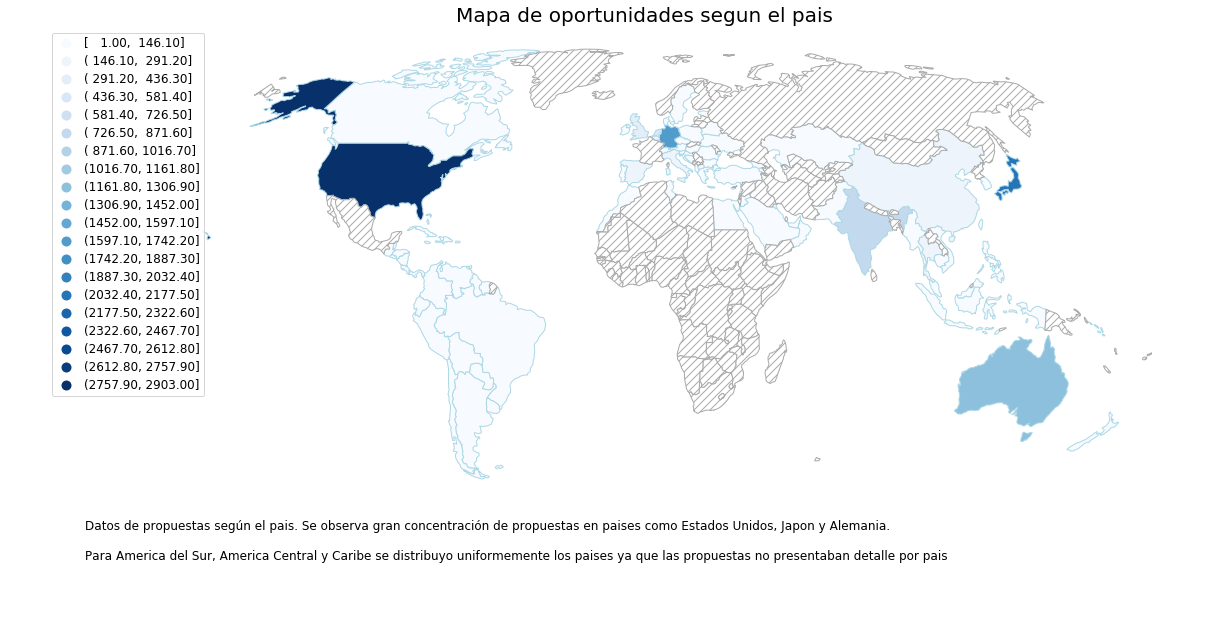

In [478]:
paisesConCasos = world.dropna(subset=['Total'])
paisesSinCasos = world[world['Total'].isna()] 

ax = paisesConCasos.plot(column='Total', cmap='Blues', figsize=(20, 12), k=20, legend=True, edgecolor='lightblue',scheme='EqualInterval')
paisesSinCasos.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de oportunidades segun el pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de propuestas según el pais. Se observa gran concentración de propuestas en paises como Estados Unidos, Japon y Alemania. \n
Para America del Sur, America Central y Caribe se distribuyo uniformemente los paises ya que las propuestas no presentaban detalle por pais'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()

legend.set_bbox_to_anchor((.11, 1))
legend.prop.set_size(12)

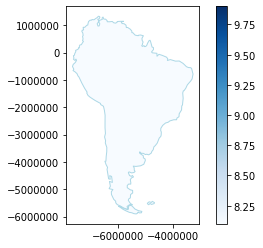

In [434]:
# dissolve the state boundary by region 
southAmerica = world[world.continent=='South America'].dissolve(by='continent')

# view the resulting geodataframe
ax = southAmerica.plot( column='Total', cmap='Blues', k=10,legend=True, edgecolor='lightblue')

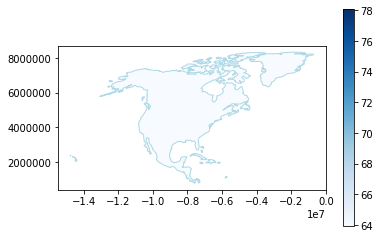

In [435]:
# dissolve the state boundary by region 
NorthAmerica = world[world.continent=='North America'].dissolve(by='continent')

# view the resulting geodataframe
ax = NorthAmerica.plot( column='Total', cmap='Blues', k=10,legend=True, edgecolor='lightblue')

In [436]:
NorthAmerica

,geometry,pop_est,name,iso_a3,gdp_md_est,Total
continent,,,,,,
North America,"MULTIPOLYGON (((-5796692.599 1150802.640, -574...",35623680,Canada,CAN,1674000.0,71.0


In [437]:
world[world.continent=='North America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10...",71.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-6657796.595 2108496.606, -6655812.8...",30.0
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-6676058.533 1929944.389, -6671160.3...",30.0
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-7229455.058 2865226.366, -718...",30.0
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-2627201.180 8280938.168, -2414731.2...",NaN
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-10531523.735 3479791.470, -10426403...",NaN
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-7282002.498 927327.138, -7294190.60...",37.0
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-7765577.595 1023116.582, -7802508.3...",37.0
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-7860677.966 1169921.817, -7884702.0...",37.0


In [438]:
valor = continents[continents.continent=='South America'].geometry
for index, row in paisesConCasos.iterrows(): 
    
    if row["continent"] == 'South America':  
        print (row["continent"], index, continents[continents.continent=='South America'].geometry)
        #paisesConCasos.iloc[index]["geometry2"] =  valor
        #paisesConCasos.loc[index, 'Territory_unified'] = South_America[j]
  

NameError: name 'continents' is not defined

### Grafico por continente

In [ ]:
continents.loc[:,'Total'] = 1
continents

In [ ]:
continents[continents.continent=='South America'].plot( column='Total', cmap='Blues', k=10, edgecolor='lightblue')


In [ ]:
#counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

df_train[~df_train.Actual_Delivery_Date.isna()].Actual_Delivery_Date.value_counts()


In [ ]:
columna = df_train.Actual_Delivery_Date
df_train[~columna.isna()].Actual_Delivery_Date.value_counts()


In [ ]:
pd.isna(df_train.Actual_Delivery_Date).value_counts()

In [ ]:
df_train.Actual_Delivery_Date.count()

In [ ]:
df_train[['month','product1','product2','product3']].groupby('month')\
.mean().plot(figsize=(10,6), fontsize=12, title='Monthly Sales of Products')

In [ ]:
 df_train['Product_Family'].value_counts().nlargest(10)

In [ ]:
df_train['month',].head(10)

In [487]:
df_train.groupby('Opportunity_Name')['Total'].count().to_frame().sort_values('Total')

,Total
Opportunity_Name,
Opportunity_Name_4268,1
Opportunity_Name_5893,1
Opportunity_Name_5892,1
Opportunity_Name_5889,1
Opportunity_Name_5888,1
Opportunity_Name_5887,1
Opportunity_Name_5886,1
Opportunity_Name_5885,1
Opportunity_Name_5884,1


In [488]:
df_train[df_train['Opportunity_Name']=='Opportunity_Name_5036']

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Territory_unified,Region_unified,iso3,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total
2747,20112.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2748,20115.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2749,20118.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2750,20122.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2751,20125.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2752,20128.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2753,20132.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2754,20135.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2755,20138.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0
2756,20141.0,Americas,NW America,1.0,1.0,1.0,0.0,0.0,Bureaucratic_Code_2,8/22/2013,...,United States,Americas,USA,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0


In [491]:

df_train[df_train['Opportunity_Name']=='Opportunity_Name_4779'].transpose()

,10338,10339,10340,10341,10342,10343,10344,10345,10346,10347
ID,12154,12126,12132,12237,12243,12248,12254,12259,12265,12270
Region,APAC,APAC,APAC,APAC,APAC,APAC,APAC,APAC,APAC,APAC
Territory,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
"Pricing, Delivery_Terms_Quote_Appr",1,1,1,1,1,1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,1,1,1,1,1,1,1,1,1
Bureaucratic_Code_0_Approval,1,1,1,1,1,1,1,1,1,1
Bureaucratic_Code_0_Approved,1,1,1,1,1,1,1,1,1,1
Submitted_for_Approval,0,0,0,0,0,0,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4
Account_Created_Date,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016,9/28/2016


### Mapa de paises por oportunidades

Genero el mapa agrupando por oportunidades

In [523]:
df_train_oportunity = df_train.groupby(['Opportunity_Name','iso_a3'])['Total'].count().to_frame().sort_values('Total')

In [524]:
df_train_oportunity

,,Total
Opportunity_Name,iso_a3,
Opportunity_Name_4268,JPN,1
Opportunity_Name_5897,JPN,1
Opportunity_Name_5894,IND,1
Opportunity_Name_5893,DEU,1
Opportunity_Name_5892,JPN,1
Opportunity_Name_5889,JPN,1
Opportunity_Name_5888,USA,1
Opportunity_Name_5887,JPN,1
Opportunity_Name_5886,JPN,1


In [525]:
df_train_oportunity.reset_index()

,Opportunity_Name,iso_a3,Total
0,Opportunity_Name_4268,JPN,1
1,Opportunity_Name_5897,JPN,1
2,Opportunity_Name_5894,IND,1
3,Opportunity_Name_5893,DEU,1
4,Opportunity_Name_5892,JPN,1
5,Opportunity_Name_5889,JPN,1
6,Opportunity_Name_5888,USA,1
7,Opportunity_Name_5887,JPN,1
8,Opportunity_Name_5886,JPN,1
9,Opportunity_Name_5885,JPN,1


In [526]:

world_oportunity = world[world.name != 'Antarctica']



In [527]:
df_train_oportunity = df_train_oportunity.reset_index()

In [528]:
df_train_oportunity[df_train_oportunity.iso_a3=='CAN']

,Opportunity_Name,iso_a3,Total
314,Opportunity_Name_538,CAN,1
335,Opportunity_Name_544,CAN,1
728,Opportunity_Name_6204,CAN,1
831,Opportunity_Name_648,CAN,1
865,Opportunity_Name_647,CAN,1
975,Opportunity_Name_418,CAN,1
1020,Opportunity_Name_410,CAN,1
1037,Opportunity_Name_407,CAN,1
1328,Opportunity_Name_3977,CAN,1
1341,Opportunity_Name_406,CAN,1


In [529]:
df_train_oportunity

,Opportunity_Name,iso_a3,Total
0,Opportunity_Name_4268,JPN,1
1,Opportunity_Name_5897,JPN,1
2,Opportunity_Name_5894,IND,1
3,Opportunity_Name_5893,DEU,1
4,Opportunity_Name_5892,JPN,1
5,Opportunity_Name_5889,JPN,1
6,Opportunity_Name_5888,USA,1
7,Opportunity_Name_5887,JPN,1
8,Opportunity_Name_5886,JPN,1
9,Opportunity_Name_5885,JPN,1


In [533]:
counts_oportunity = df_train_oportunity[~df_train_oportunity.iso_a3.isna()].iso_a3.value_counts()
counts_oportunity.name = 'Total_oportunity'
world_oportunity = world_oportunity.join(counts_oportunity, on='iso_a3')

ValueError: columns overlap but no suffix specified: Index(['Total_oportunity'], dtype='object')

In [534]:
world_oportunity

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total,Total_oportunity
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10...",71.0,61.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",2903.0,1959.0
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((7202132.129 5245560.427, 7171298.638...",7.0,4.0
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((4839886.346 4415250.374, 4735627.351...",NaN,NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((13315540.260 -278091.137, 1347...",NaN,NaN
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((13315540.260 -278091.137, 1329...",145.0,140.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54...",9.0,1.0


In [540]:
#Dominican Rep no coincide el nombre, se tuvo que cambiar
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]

world_oportunity.loc[(world_oportunity.name.isin(Carribean))]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total,Total_oportunity
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-6657796.595 2108496.606, -6655812.8...",30.0,4.0
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-6676058.533 1929944.389, -6671160.3...",30.0,3.0
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-7229455.058 2865226.366, -718...",30.0,3.0
45,3351827,North America,Puerto Rico,PRI,131000.0,"POLYGON ((-6166125.252 1980186.489, -6119470.4...",30.0,3.0
46,2990561,North America,Jamaica,JAM,25390.0,"POLYGON ((-7216438.882 1977594.379, -7154894.3...",30.0,4.0
47,11147407,North America,Cuba,CUB,132900.0,"POLYGON ((-7590791.575 2480071.811, -7512127.3...",30.0,4.0
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-5796692.599 1150802.640, -5741973.2...",30.0,4.0


In [541]:
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]

world_oportunity.loc[(world_oportunity.continent=='North America') & (world_oportunity.name.isin(CentralAmerica))]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total,Total_oportunity
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-7282002.498 927327.138, -7294190.60...",37.0,1.0
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-7765577.595 1023116.582, -7802508.3...",37.0,1.0
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-7860677.966 1169921.817, -7884702.0...",37.0,1.0
36,9038741,North America,Honduras,HND,43190.0,"POLYGON ((-7776977.047 1603832.052, -7808818.8...",37.0,5.0
37,6172011,North America,El Salvador,SLV,54790.0,"POLYGON ((-8363817.925 1542688.319, -8337128.7...",37.0,1.0
38,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-8631583.388 1554955.209, -8625948.6...",37.0,1.0
39,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-8302445.688 1904631.333, -8301184.5...",37.0,2.0


a modo de coreccion agregamos para americo del sur Paragua y Guyanas para mejorar la representacion

In [546]:
world_oportunity.loc[(world_oportunity.continent=='South America')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Total,Total_oportunity
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54...",9.0,1.0
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-5518836.616 -5598093.654, -54...",9.0,1.0
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-4950869.681 -5517533.871, -4875637....",9.0,NaN
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-5222856.014 -3231696.542, -5165791....",9.0,1.0
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-4776893.995 -3611664.215, -4812062....",9.0,1.0
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-6533260.003 -1171309.001, -6462888....",9.0,1.0
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-6596232.740 -459699.292, -6681415.9...",9.0,1.0
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-6317593.241 134049.312, -6335544.05...",9.0,1.0
40,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-5729323.869 556179.612, -5717618.22...",9.0,1.0
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-5340397.978 203157.587, -5363425.88...",9.0,NaN


In [ ]:
# correccion para agregar Paraguay y Guyanas
world_oportunity.loc[(world_oportunity.continent=='South America'),'Total_oportunity'] = 1


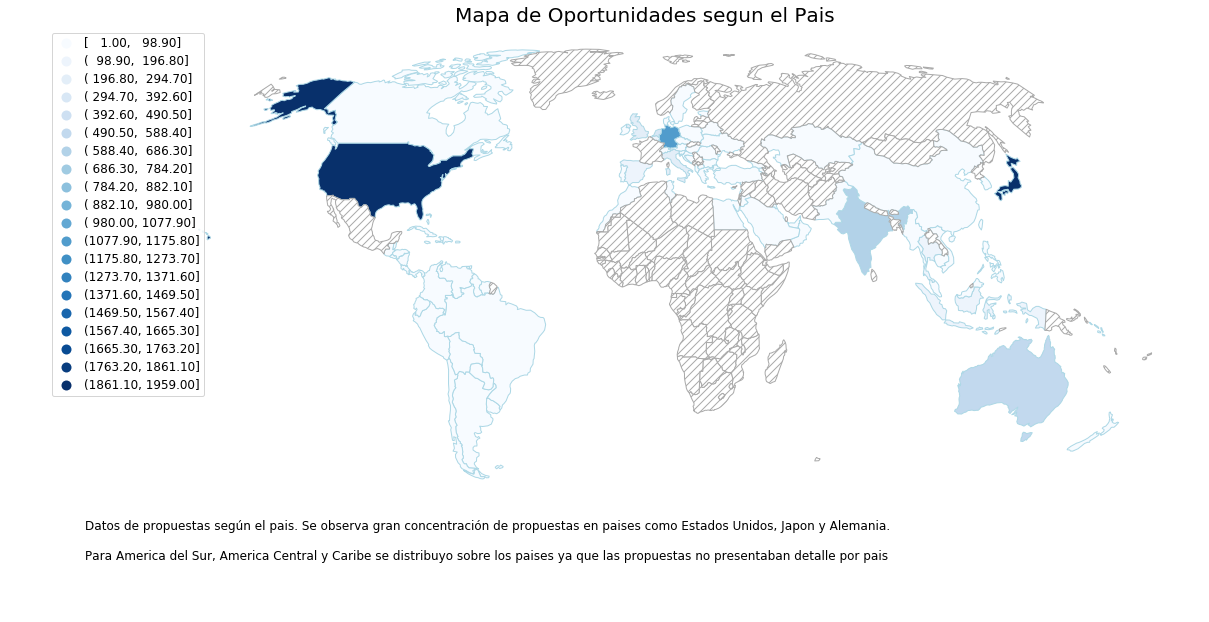

In [574]:
paisesConOportunidades = world_oportunity.dropna(subset=['Total_oportunity'])
paisesSinOportunidades = world_oportunity[world_oportunity['Total_oportunity'].isna()] 

ax = paisesConOportunidades.plot(column='Total_oportunity', cmap='Blues', figsize=(20, 12), k=20, legend=True, edgecolor='lightblue',scheme='EqualInterval')
paisesSinOportunidades.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de Oportunidades segun el Pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de propuestas según el pais. Se observa gran concentración de propuestas en paises como Estados Unidos, Japon y Alemania. \n
Para America del Sur, America Central y Caribe se distribuyo sobre los paises ya que las propuestas no presentaban detalle por pais'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()

legend.set_bbox_to_anchor((.11, 1))
legend.prop.set_size(12)

In [549]:
df_train_oportunity.groupby('Opportunity_Name')['Total'].count()

Opportunity_Name
Opportunity_Name_0        1
Opportunity_Name_1        1
Opportunity_Name_100      1
Opportunity_Name_1000     1
Opportunity_Name_10000    1
Opportunity_Name_10001    1
Opportunity_Name_10002    1
Opportunity_Name_10003    1
Opportunity_Name_10005    1
Opportunity_Name_10008    1
Opportunity_Name_10009    1
Opportunity_Name_10010    1
Opportunity_Name_10011    1
Opportunity_Name_10015    1
Opportunity_Name_10017    1
Opportunity_Name_10018    1
Opportunity_Name_10020    1
Opportunity_Name_10021    1
Opportunity_Name_10022    1
Opportunity_Name_10023    1
Opportunity_Name_10024    1
Opportunity_Name_10025    1
Opportunity_Name_10026    1
Opportunity_Name_10027    1
Opportunity_Name_10028    1
Opportunity_Name_1003     1
Opportunity_Name_10035    1
Opportunity_Name_10038    1
Opportunity_Name_1004     1
Opportunity_Name_10040    1
                         ..
Opportunity_Name_9968     1
Opportunity_Name_9969     1
Opportunity_Name_9970     1
Opportunity_Name_9971     1
Opp

In [553]:
df_train_oportunity

,Opportunity_Name,iso_a3,Total
0,Opportunity_Name_4268,JPN,1
1,Opportunity_Name_5897,JPN,1
2,Opportunity_Name_5894,IND,1
3,Opportunity_Name_5893,DEU,1
4,Opportunity_Name_5892,JPN,1
5,Opportunity_Name_5889,JPN,1
6,Opportunity_Name_5888,USA,1
7,Opportunity_Name_5887,JPN,1
8,Opportunity_Name_5886,JPN,1
9,Opportunity_Name_5885,JPN,1


In [566]:
df_train_oportunity[df_train_oportunity.iso_a3.isin(list(sur))]

,Opportunity_Name,iso_a3,Total
1273,Opportunity_Name_3649,URY,1
2117,Opportunity_Name_9060,PER,1
2118,Opportunity_Name_9060,COL,1
3673,Opportunity_Name_773,BOL,1
3681,Opportunity_Name_774,VEN,1
3682,Opportunity_Name_774,ECU,1
4067,Opportunity_Name_12621,CHL,1
5002,Opportunity_Name_1235,BRA,1
5579,Opportunity_Name_10379,ARG,1


In [572]:
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]
caribe = world.loc[(world.name.isin(Carribean))].iso_a3

df_train_oportunity[df_train_oportunity.iso_a3.isin(list(caribe))].sort_values(by='Opportunity_Name')

,Opportunity_Name,iso_a3,Total
6757,Opportunity_Name_1062,TTO,1
5313,Opportunity_Name_11285,PRI,1
5292,Opportunity_Name_11286,DOM,1
5240,Opportunity_Name_121,CUB,1
3920,Opportunity_Name_1500,DOM,1
3929,Opportunity_Name_1501,BHS,1
3934,Opportunity_Name_1539,TTO,1
6740,Opportunity_Name_25,TTO,1
5727,Opportunity_Name_284,HTI,1
5726,Opportunity_Name_284,JAM,1
